In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
img = cv2.imread(r"opencv_2\media\sekil.jpg", 0)
ret, img = cv2.threshold(img,225, 255, cv2.THRESH_BINARY) 
img = cv2.bitwise_not(img)


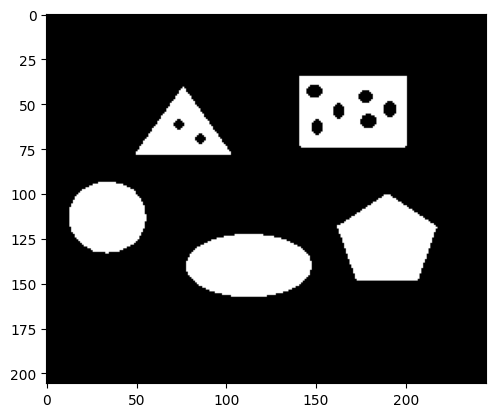

In [49]:
plt.imshow(img, cmap='gray')

In [50]:
img.shape

(206, 245)

In [51]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# cv2.RETR_CCOMP : iç ve dış konturları bulur
# cv2.CHAIN_APPROX_SIMPLE : konturları sadeleştirir
# hierarchy = konturların hiyerarşik yapısını verir

In [52]:
hierarchy.shape

(1, 13, 4)

In [58]:
hierarchy
# eğer son değeri -1 ise dış kontur
# eğer son değeri 0 ise kontur

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 6,  2,  4, -1],
        [ 5, -1, -1,  3],
        [-1,  4, -1,  3],
        [-1,  3,  7, -1],
        [ 8, -1, -1,  6],
        [ 9,  7, -1,  6],
        [10,  8, -1,  6],
        [11,  9, -1,  6],
        [12, 10, -1,  6],
        [-1, 11, -1,  6]]], dtype=int32)

In [59]:
external_contours = np.zeros(img.shape)

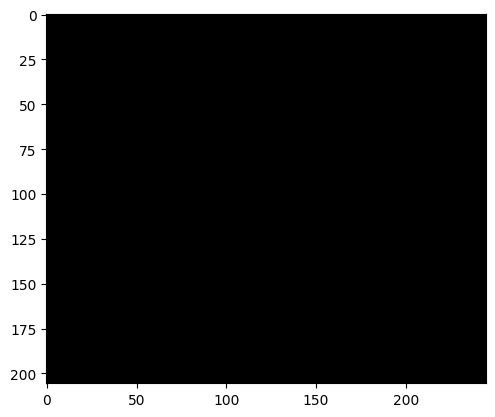

In [60]:
plt.imshow(external_contours, cmap='gray')

In [61]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1: # dış kontur
        cv2.drawContours(external_contours, contours, i, 255, -1)

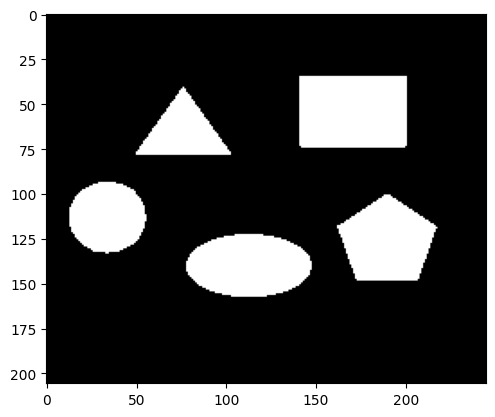

In [62]:
plt.imshow(external_contours, cmap='gray')

In [63]:
image_internal = np.zeros(img.shape) # iç konturlar için boş bir resim oluştur

for i in range(len(contours)):
    if hierarchy[0][i][3] != -1: # iç kontur
        cv2.drawContours(image_internal, contours, i, 255, -1) # iç konturları çizdir

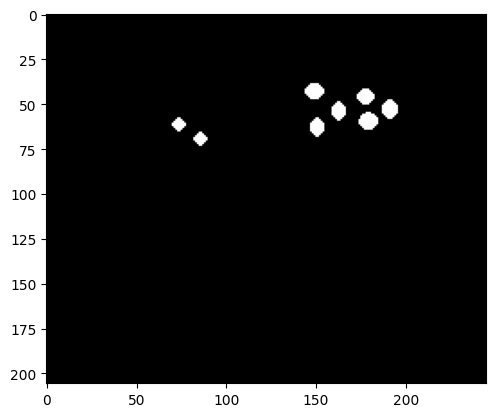

In [64]:
plt.imshow(image_internal, cmap='gray')